Jupyter slideshow: This notebook can be displayed as slides. To view it as a slideshow in your browser, type the following in the console:

> jupyter nbconvert EDASlides.ipynb --to slides --post serve

To toggle off the slideshow cell formatting, click the CellToolbar button, then View --> Cell Toolbar --> None.

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Exploratory Data Analysis (EDA)

_Jonathan | Jon | Ibrahim_

---

### Objectives

- Data Collection
- Data Cleaning
- Data Visualisation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

%matplotlib inline

### Data Collection

Data collection is the process of gathering information in an established systematic way that enables one to test hypothesis and evaluate outcomes easily.

In [2]:
fifa = pd.read_csv('./DataSets/FIFA18.csv', low_memory=False)

In [3]:
fifa.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After getting data we need to check the data-type of features.

There are following types of features :

- numeric
- categorical
- ordinal
- datetime
- coordinates

In order to know the data types/features of data, we need to run:

In [4]:
fifa.dtypes

Unnamed: 0               int64
Name                    object
Age                      int64
Photo                   object
Nationality             object
Flag                    object
Overall                  int64
Potential                int64
Club                    object
Club Logo               object
Value                   object
Wage                    object
Special                  int64
Acceleration            object
Aggression              object
Agility                 object
Balance                 object
Ball control            object
Composure               object
Crossing                object
Curve                   object
Dribbling               object
Finishing               object
Free kick accuracy      object
GK diving               object
GK handling             object
GK kicking              object
GK positioning          object
GK reflexes             object
Heading accuracy        object
                        ...   
Vision                  object
Volleys 

In [5]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 75 columns):
Unnamed: 0             17981 non-null int64
Name                   17981 non-null object
Age                    17981 non-null int64
Photo                  17981 non-null object
Nationality            17981 non-null object
Flag                   17981 non-null object
Overall                17981 non-null int64
Potential              17981 non-null int64
Club                   17733 non-null object
Club Logo              17981 non-null object
Value                  17981 non-null object
Wage                   17981 non-null object
Special                17981 non-null int64
Acceleration           17981 non-null object
Aggression             17981 non-null object
Agility                17981 non-null object
Balance                17981 non-null object
Ball control           17981 non-null object
Composure              17981 non-null object
Crossing               17981 non-null obj

### Data Clean

High-level, data types are a way or storying data that can be utilized for different purposes. For our arithmetic and visualization purposes, we want to change the datatypes to floats or integers.

In [6]:
def remove_currency(data_column):
    '''
    replace €, K from data column and convert to int
    
    args:
       data_column (series): column which contains €, K
       
    return:
        return clean column
    '''
    data_column = data_column.str.replace('€', '')
    data_column = data_column.str.replace('K', '')
    data_column = pd.to_numeric(data_column)
    return data_column

In [7]:
fifa["Wage"] = remove_currency(fifa["Wage"])

In [8]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 75 columns):
Unnamed: 0             17981 non-null int64
Name                   17981 non-null object
Age                    17981 non-null int64
Photo                  17981 non-null object
Nationality            17981 non-null object
Flag                   17981 non-null object
Overall                17981 non-null int64
Potential              17981 non-null int64
Club                   17733 non-null object
Club Logo              17981 non-null object
Value                  17981 non-null object
Wage                   17981 non-null int64
Special                17981 non-null int64
Acceleration           17981 non-null object
Aggression             17981 non-null object
Agility                17981 non-null object
Balance                17981 non-null object
Ball control           17981 non-null object
Composure              17981 non-null object
Crossing               17981 non-null obje

- describe() function shows the statistics of the data.

- If you try running this with columns that do not have all integers or floats, then the column data will not be displayed. 

- It can be very useful to look at these statistics early on to get high level idea about the data.

In [9]:
fifa.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,17981.0,8990.000000,5190.811931,0.0,4495.0,8990.0,13485.0,17980.0
Age,17981.0,25.144541,4.614272,16.0,21.0,25.0,28.0,47.0
Overall,17981.0,66.247984,6.987965,46.0,62.0,66.0,71.0,94.0
Potential,17981.0,71.190813,6.102199,46.0,67.0,71.0,75.0,94.0
Wage,17981.0,11.546966,23.080000,0.0,2.0,4.0,12.0,565.0
Special,17981.0,1594.095100,272.151435,728.0,1449.0,1633.0,1786.0,2291.0
CAM,15952.0,59.251755,9.880164,27.0,53.0,60.0,66.0,92.0
CB,15952.0,55.550464,12.192579,25.0,45.0,57.0,65.0,87.0
CDM,15952.0,56.865283,10.310178,26.0,49.0,58.0,65.0,85.0
CF,15952.0,59.030028,9.926988,27.0,53.0,60.0,66.0,92.0


### Data Visualizations

- Charts or graphs that visualize large amounts of complex data are easier to understand than spreadsheets or reports.

- Data visualization is a quick, easy way to convey concepts in a universal manner

In [10]:
fifa.corr()

,Unnamed: 0,Age,Overall,Potential,Wage,Special,CAM,CB,CDM,CF,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
Unnamed: 0,1.000000,-0.463961,-0.975180,-0.657119,-0.518905,-0.595095,-0.635310,-0.443931,-0.599442,-0.621341,...,-0.553417,-0.443931,-0.750338,-0.599442,-0.621341,-0.641388,-0.649919,-0.595208,-0.619348,-0.649919
Age,-0.463961,1.000000,0.459765,-0.218264,0.150006,0.238667,0.245855,0.337481,0.383450,0.235596,...,0.321227,0.337481,0.365783,0.383450,0.235596,0.232945,0.287541,0.206051,0.337143,0.287541
Overall,-0.975180,0.459765,1.000000,0.683474,0.593789,0.604092,0.650313,0.448856,0.607727,0.636278,...,0.561887,0.448856,0.764609,0.607727,0.636278,0.656745,0.664822,0.610198,0.629401,0.664822
Potential,-0.657119,-0.218264,0.683474,1.000000,0.519062,0.399511,0.470421,0.219380,0.345344,0.458830,...,0.330672,0.219380,0.508133,0.345344,0.458830,0.474998,0.447747,0.448580,0.383213,0.447747
Wage,-0.518905,0.150006,0.593789,0.519062,1.000000,0.367419,0.412427,0.220554,0.321822,0.408102,...,0.299300,0.220554,0.457183,0.321822,0.408102,0.412422,0.421092,0.390940,0.343395,0.421092
Special,-0.595095,0.238667,0.604092,0.399511,0.367419,1.000000,0.854197,0.401629,0.650723,0.822487,...,0.623048,0.401629,0.943764,0.650723,0.822487,0.872130,0.793552,0.825615,0.735167,0.793552
CAM,-0.635310,0.245855,0.650313,0.470421,0.412427,0.854197,1.000000,-0.070694,0.257182,0.986346,...,0.204500,-0.070694,0.903315,0.257182,0.986346,0.983408,0.927452,0.983941,0.368896,0.927452
CB,-0.443931,0.337481,0.448856,0.219380,0.220554,0.401629,-0.070694,1.000000,0.929486,-0.141250,...,0.926170,1.000000,0.328064,0.929486,-0.141250,-0.029624,-0.129200,-0.139745,0.849959,-0.129200
CDM,-0.599442,0.383450,0.607727,0.345344,0.321822,0.650723,0.257182,0.929486,1.000000,0.165728,...,0.968022,0.929486,0.631197,1.000000,0.165728,0.292332,0.129067,0.175801,0.955188,0.129067
CF,-0.621341,0.235596,0.636278,0.458830,0.408102,0.822487,0.986346,-0.141250,0.165728,1.000000,...,0.123218,-0.141250,0.846493,0.165728,1.000000,0.970136,0.967872,0.986833,0.286582,0.967872


Text(0.5,1,'Age/Wage')

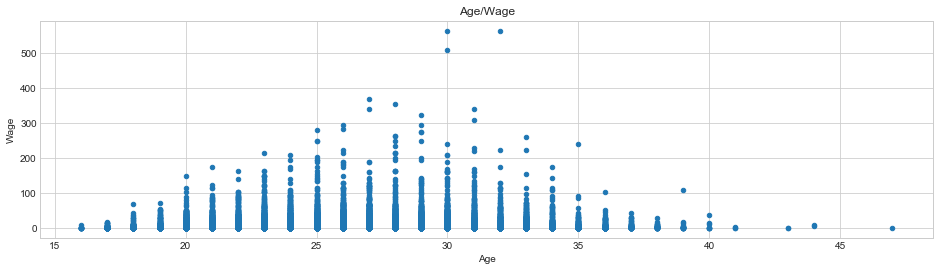

In [11]:
ax = fifa.plot.scatter('Age', 'Wage', figsize=(16,4))
ax.set_title("Age/Wage")

- Data visualization is a quick, easy way to convey concepts in a universal manner



- 'line' : line plot (default)
- 'bar' : vertical bar plot
- 'barh' : horizontal bar plot
- 'hist' : histogram
- 'box' : boxplot
- 'kde' : Kernel Density Estimation plot
- 'density' : same as 'kde'
- 'area' : area plot
- 'pie' : pie plot
- 'scatter' : scatter plot
- 'hexbin' : hexbin plot

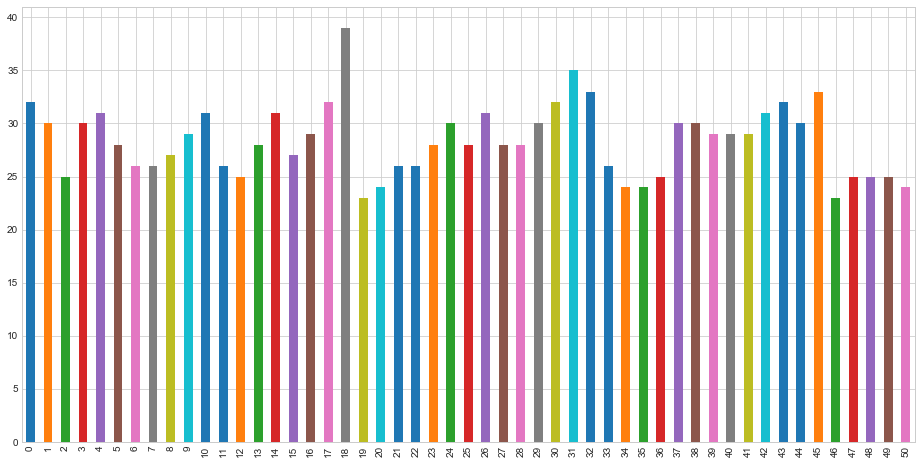

In [18]:
# 'bar' : vertical bar plot

fifa.loc[0:50]['Age'].plot(kind='bar', figsize=(16,8))

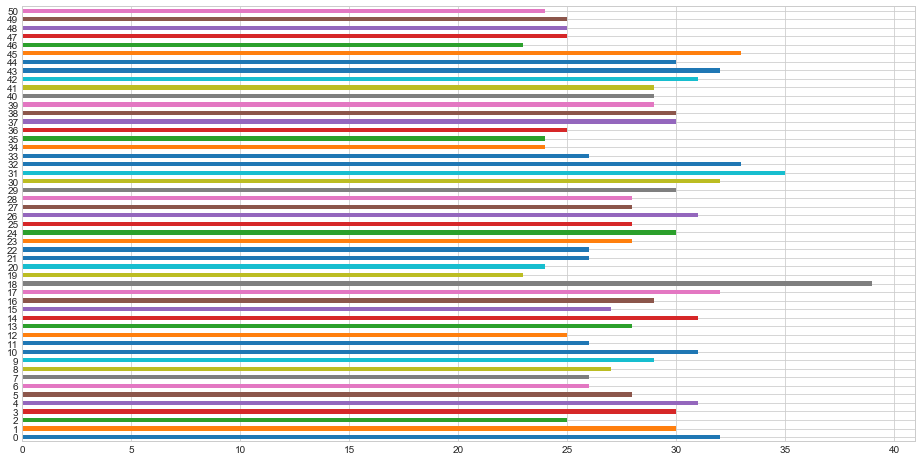

In [19]:
# 'barh' : horizontal bar plot

fifa.loc[0:50]['Age'].plot(kind='barh', figsize=(16,8))

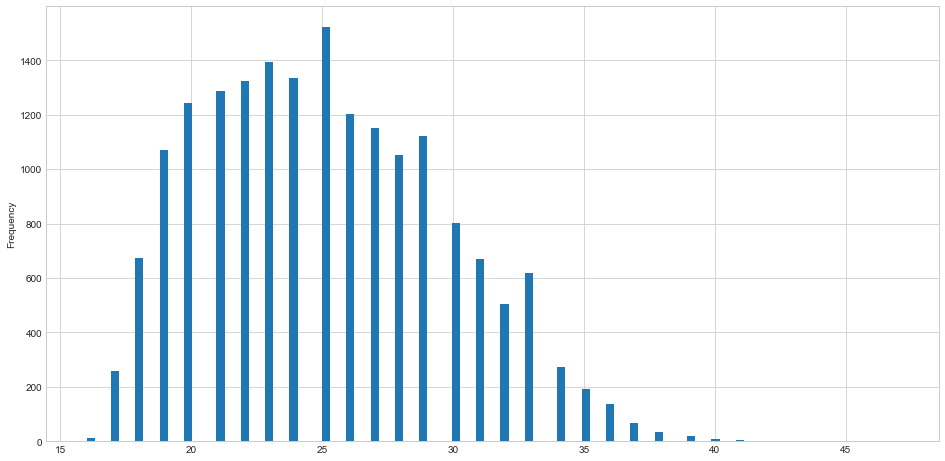

In [23]:
# 'hist' : histogram

fifa.loc[0:]['Age'].plot(kind='hist', figsize=(16,8), bins=100)

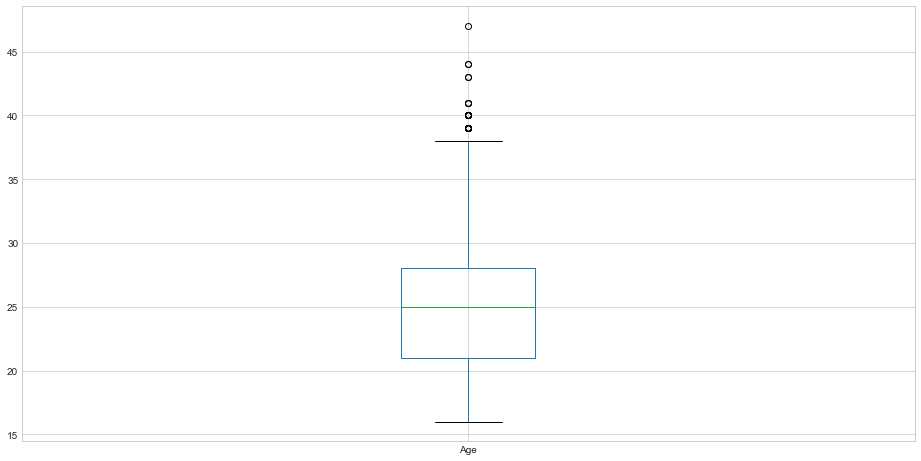

In [25]:
# 'box' : boxplot

fifa.loc[0:]['Age'].plot(kind='box', figsize=(16,8))

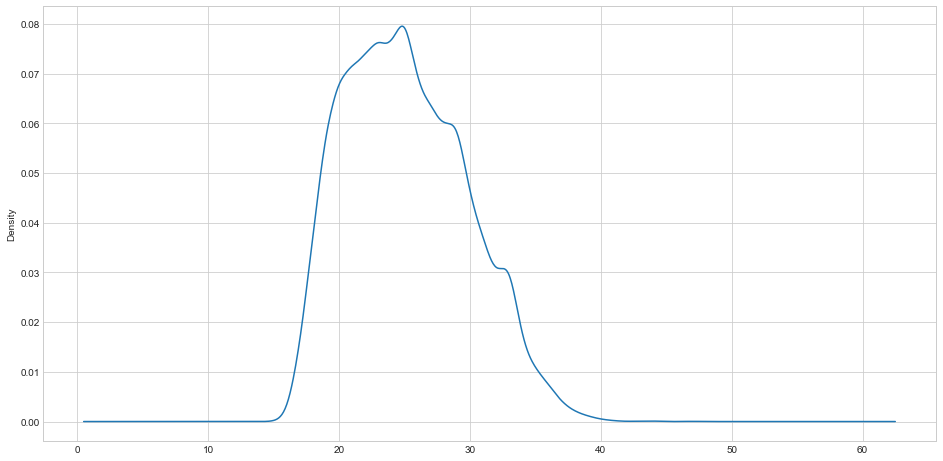

In [29]:
# 'kde' : Kernel Density Estimation plot

fifa.loc[0:]['Age'].plot(kind='kde', figsize=(16,8))

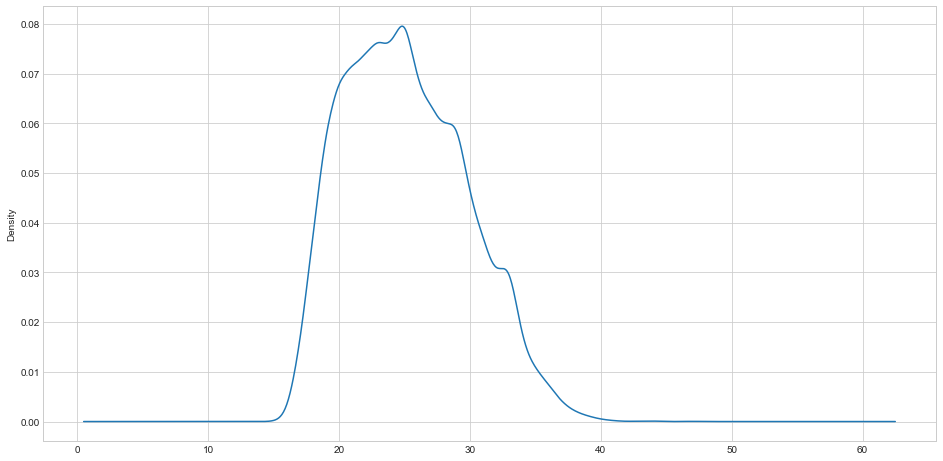

In [28]:
# 'density' : same as 'kde'

fifa.loc[0:]['Age'].plot(kind='density', figsize=(16,8))

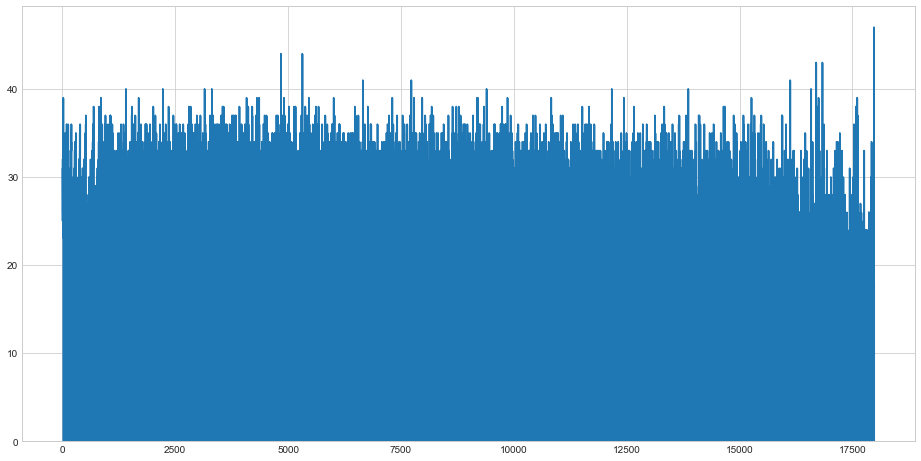

In [32]:
# 'area' : area plot

fifa.loc[0:]['Age'].plot(kind='area', figsize=(16,8))

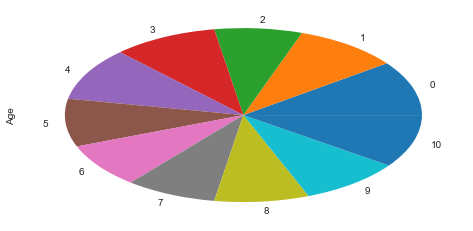

In [38]:
# 'pie' : pie plot

fifa.loc[0:10]['Age'].plot(kind='pie', figsize=(8,4))

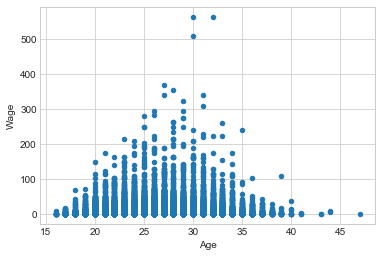

In [40]:
# 'scatter' : scatter plot

fifa.plot(kind='scatter', x='Age', y='Wage')

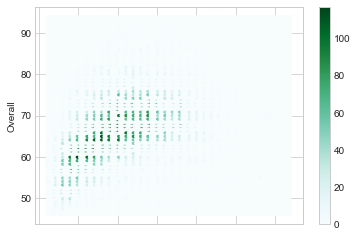

In [43]:
# 'hexbin' : hexbin plot

fifa.plot(kind='hexbin', x='Age', y='Overall')